# Foreign Exchange Rate Prediction using LSTM Recurrent Neural Network

In [3]:
#Importing Linraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import keras

In [4]:
#Reading dataset
data_set = pd.read_csv('sample_data/Foreign_Exchange_Rates.csv', na_values='ND')

In [5]:
data_set.shape

(5217, 24)

In [6]:
#Dataset head
data_set.head()

,Unnamed: 0,Time Serie,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,...,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
0,0,2000-01-03,1.5172,0.9847,1.9033,0.6146,1.8050,1.4465,8.2798,7.7765,...,1.6563,7.3290,101.70,3.8,7.964,8.4430,72.30,1.5808,31.38,36.97
1,1,2000-01-04,1.5239,0.9700,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,...,1.6535,7.2180,103.09,3.8,7.934,8.3600,72.65,1.5565,30.60,37.13
2,2,2000-01-05,1.5267,0.9676,1.9339,0.6092,1.8560,1.4518,8.2798,7.7780,...,1.6560,7.2080,103.77,3.8,7.935,8.3530,72.95,1.5526,30.80,37.10
3,3,2000-01-06,1.5291,0.9686,1.9436,0.6070,1.8400,1.4571,8.2797,7.7785,...,1.6655,7.2125,105.19,3.8,7.940,8.3675,72.95,1.5540,31.75,37.62
4,4,2000-01-07,1.5272,0.9714,1.9380,0.6104,1.8310,1.4505,8.2794,7.7783,...,1.6625,7.2285,105.17,3.8,7.966,8.4150,73.15,1.5623,30.85,37.30


In [7]:
#Checking null values
data_set.isnull().sum()

Unnamed: 0                                     0
Time Serie                                     0
AUSTRALIA - AUSTRALIAN DOLLAR/US$            198
EURO AREA - EURO/US$                         198
NEW ZEALAND - NEW ZELAND DOLLAR/US$          198
UNITED KINGDOM - UNITED KINGDOM POUND/US$    198
BRAZIL - REAL/US$                            198
CANADA - CANADIAN DOLLAR/US$                 198
CHINA - YUAN/US$                             197
HONG KONG - HONG KONG DOLLAR/US$             198
INDIA - INDIAN RUPEE/US$                     199
KOREA - WON/US$                              198
MEXICO - MEXICAN PESO/US$                    198
SOUTH AFRICA - RAND/US$                      198
SINGAPORE - SINGAPORE DOLLAR/US$             198
DENMARK - DANISH KRONE/US$                   198
JAPAN - YEN/US$                              198
MALAYSIA - RINGGIT/US$                       198
NORWAY - NORWEGIAN KRONE/US$                 198
SWEDEN - KRONA/US$                           198
SRI LANKA - SRI LANK

In [8]:
data_set.interpolate(inplace=True)
data_set.isnull().sum()

Unnamed: 0                                   0
Time Serie                                   0
AUSTRALIA - AUSTRALIAN DOLLAR/US$            0
EURO AREA - EURO/US$                         0
NEW ZEALAND - NEW ZELAND DOLLAR/US$          0
UNITED KINGDOM - UNITED KINGDOM POUND/US$    0
BRAZIL - REAL/US$                            0
CANADA - CANADIAN DOLLAR/US$                 0
CHINA - YUAN/US$                             0
HONG KONG - HONG KONG DOLLAR/US$             0
INDIA - INDIAN RUPEE/US$                     0
KOREA - WON/US$                              0
MEXICO - MEXICAN PESO/US$                    0
SOUTH AFRICA - RAND/US$                      0
SINGAPORE - SINGAPORE DOLLAR/US$             0
DENMARK - DANISH KRONE/US$                   0
JAPAN - YEN/US$                              0
MALAYSIA - RINGGIT/US$                       0
NORWAY - NORWEGIAN KRONE/US$                 0
SWEDEN - KRONA/US$                           0
SRI LANKA - SRI LANKAN RUPEE/US$             0
SWITZERLAND -

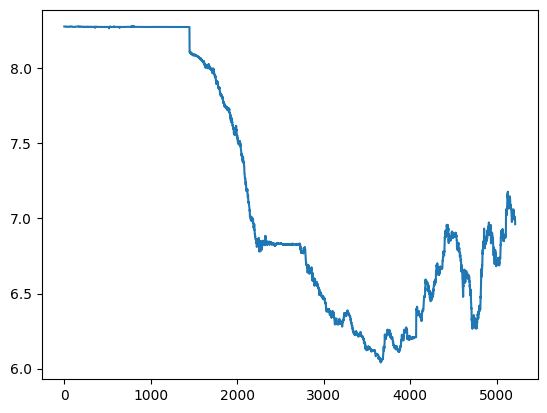

In [9]:
#Plotting China Exchange rate
plt.plot(data_set['CHINA - YUAN/US$'])

In [10]:
#Data frame
df = data_set['CHINA - YUAN/US$']

In [11]:
print(df)

0       8.27980
1       8.27990
2       8.27980
3       8.27970
4       8.27940
         ...   
5212    7.00065
5213    6.99490
5214    6.99540
5215    6.98640
5216    6.96180
Name: CHINA - YUAN/US$, Length: 5217, dtype: float64


In [12]:
#Preprocessing data set
df = np.array(df).reshape(-1,1)

In [13]:
df

array([[8.2798],
       [8.2799],
       [8.2798],
       ...,
       [6.9954],
       [6.9864],
       [6.9618]])

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [15]:
df = scaler.fit_transform(df)

In [16]:
df

array([[0.99991071],
       [0.99995535],
       [0.99991071],
       ...,
       [0.42646665],
       [0.42244843],
       [0.41146531]])

In [17]:
# from scipy.stats import zscore
# fft_values = fft(zscore(data_set['EURO AREA - EURO/US$']))
# n = len(data_set['EURO AREA - EURO/US$'])
# # timestep = 1  # This represents the time difference between each data point. You'll need to adjust this based on your actual time intervals.
# freq = np.fft.fftfreq(n)#, d=timestep)

# # Plot the magnitudes of the FFT
# plt.figure(figsize=(14, 7))
# plt.plot(freq, np.abs(fft_values))
# plt.title('Fourier Transform of EURO/USD Exchange Rate')
# plt.xlabel('Frequency')
# plt.ylabel('Magnitude')
# plt.grid(True)
# plt.show()


In [18]:
# import numpy as np
# from numpy.fft import fft

# def apply_fourier_transform(data):

#     # Applying Fourier Transform to each series in the dataset
#     transformed_data = fft(data)
#     return np.abs(transformed_data)  # Return the magnitude of the frequency components
# #
# # fourier_transformed_data = {}
# # for column in df.columns[1:]:  # Skip 'Time Serie' which is the date
# #     fourier_transformed_data[column] = apply_fourier_transform(df[column].values)


In [19]:
# import matplotlib.pyplot as plt

# # Example to plot the Fourier Transform result for one currency
# fourier_transformed_data = apply_fourier_transform(df)
# plt.figure(figsize=(14, 7))
# plt.plot(fourier_transformed_data)
# plt.title('Frequency Components of CNY/USD Exchange Rate')
# plt.xlabel('Frequency Index')
# plt.ylabel('Magnitude')
# plt.legend()
# plt.show()


In [20]:
#Training and test sets
train = df[:4800]
test = df[4800:]

print(train.shape)
print(test.shape)

(4800, 1)
(417, 1)


In [21]:
def get_data(data, look_back):
  datax, datay = [],[]
  for i in range(len(data)-look_back-1):
    datax.append(data[i:(i+look_back),0])
    datay.append(data[i+look_back,0])
  return np.array(datax) , np.array(datay)

In [22]:
look_back = 1

x_train , y_train = get_data(train, look_back)
print(x_train.shape)
print(y_train.shape)

(4798, 1)
(4798,)


In [23]:
x_test , y_test = get_data(test,look_back)
print(x_test.shape)
print(y_test.shape)

(415, 1)
(415,)


In [24]:
#Processing train and test sets for LSTM model
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1], 1)

In [25]:
print(x_train.shape)
print(x_test.shape)


(4798, 1, 1)
(415, 1, 1)


In [26]:
#Defining the LSTM model
from keras.models import Sequential
from keras.layers import Dense,LSTM


In [27]:
n_features=x_train.shape[1]
model=Sequential()
model.add(LSTM(100,activation='relu',input_shape=(1,1)))
model.add(Dense(n_features))

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40901 (159.77 KB)
Trainable params: 40901 (159.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
#Compiling
model.compile(optimizer='adam', loss = 'mse')

In [30]:
#Training
model.fit(x_train,y_train, epochs = 5, batch_size=1)

Epoch 1/5
4798/4798 [==============================] - 17s 3ms/step - loss: 0.0083
Epoch 2/5
4798/4798 [==============================] - 17s 4ms/step - loss: 3.5605e-05
Epoch 3/5
4798/4798 [==============================] - 15s 3ms/step - loss: 3.0596e-05
Epoch 4/5
4798/4798 [==============================] - 14s 3ms/step - loss: 2.8448e-05
Epoch 5/5
4798/4798 [==============================] - 15s 3ms/step - loss: 2.6192e-05


In [31]:
#Prediction using the trained model
scaler.scale_

array([0.44646843])

In [32]:
y_pred = model.predict(x_test)
y_pred = scaler.inverse_transform(y_pred)
print(y_pred[:10])

13/13 [==============================] - 0s 2ms/step
[[6.409829 ]
 [6.422726 ]
 [6.424021 ]
 [6.4161534]
 [6.4245186]
 [6.411572 ]
 [6.410775 ]
 [6.391655 ]
 [6.3956385]
 [6.40968  ]]


In [33]:
#Processing test shape
y_test = np.array(y_test).reshape(-1,1)
y_test = scaler.inverse_transform(y_test)
print(y_test[:10])

[[6.4162]
 [6.4175]
 [6.4096]
 [6.418 ]
 [6.405 ]
 [6.4042]
 [6.385 ]
 [6.389 ]
 [6.4031]
 [6.4   ]]


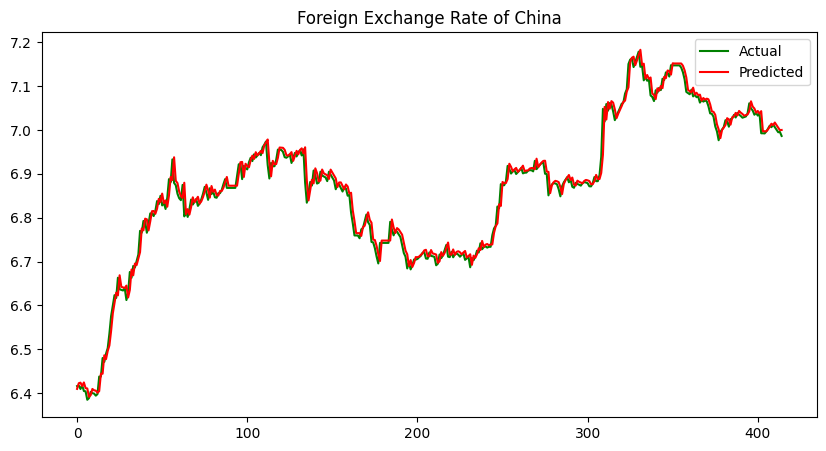

In [34]:
#Visualizing the results
plt.figure(figsize=(10,5))
plt.title('Foreign Exchange Rate of China')
plt.plot(y_test , label = 'Actual', color = 'g')
plt.plot(y_pred , label = 'Predicted', color = 'r')
plt.legend()

In [35]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

0.0003424894198150071